# ARIMA Decomposition in Time Series Analysis

This notebook demonstrates how to use ARIMA (AutoRegressive Integrated Moving Average) modeling for time series decomposition and forecasting. ARIMA is a powerful statistical method for modeling and predicting time series data, especially when the data shows trends and seasonality.

We will:
- Import required libraries
- Load and explore the AirPassengers dataset
- Visualize the time series
- Fit an ARIMA model
- Analyze model diagnostics
- Forecast future values
- Compare ARIMA decomposition to STL decomposition

**References:**
- [statsmodels ARIMA documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html)
- [AirPassengers dataset](https://vincentarelbundock.github.io/Rdatasets/articles/data.html)


## 1. Import Required Libraries

We will import pandas, matplotlib, and statsmodels for data manipulation, visualization, and ARIMA modeling.

In [1]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

## 2. Load and Explore the Dataset

We will use the AirPassengers dataset, which contains monthly totals of international airline passengers from 1949 to 1960. The time column will be set as the index.

In [2]:
# Load the AirPassengers dataset
# https://vincentarelbundock.github.io/Rdatasets/articles/data.html
data = sm.datasets.get_rdataset("AirPassengers", "datasets").data

data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='ME')
data.set_index('time', inplace=True)

data.head(24)

,value
time,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
1949-06-30,135
1949-07-31,148
1949-08-31,148
1949-09-30,136


## 3. Visualize the Time Series

Let's plot the AirPassengers data to observe its trend and seasonality.

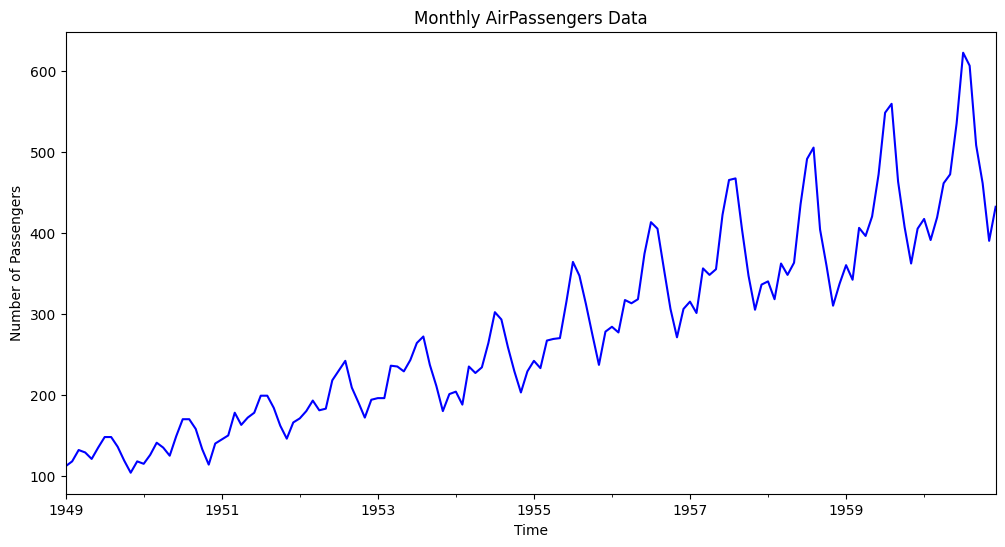

In [3]:
# Plot the time series
data['value'].plot(figsize=(12, 6), color='blue')
plt.title('Monthly AirPassengers Data')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.show()

## 4. Fit an ARIMA Model

We will fit an ARIMA model to the time series. ARIMA models are defined by three parameters: (p, d, q):
- p: number of autoregressive terms
- d: number of differences
- q: number of moving average terms

Let's use a simple ARIMA(2,1,2) model for demonstration.

In [4]:
# Fit ARIMA model
model = ARIMA(data['value'], order=(2, 1, 2))
model_fit = model.fit()

# Print summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 28 Oct 2025   AIC                           1353.347
Time:                        08:40:17   BIC                           1368.161
Sample:                    01-31-1949   HQIC                          1359.366
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.843      0.0

/Users/jonas/.pyenv/versions/anomalyebook-3.11.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/jonas/.pyenv/versions/anomalyebook-3.11.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/jonas/.pyenv/versions/anomalyebook-3.11.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/jonas/.pyenv/versions/anomalyebook-3.11.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## 5. Model Diagnostics

Let's check the residuals of the ARIMA model to assess its fit. Well-fitted models should have residuals that look like white noise.

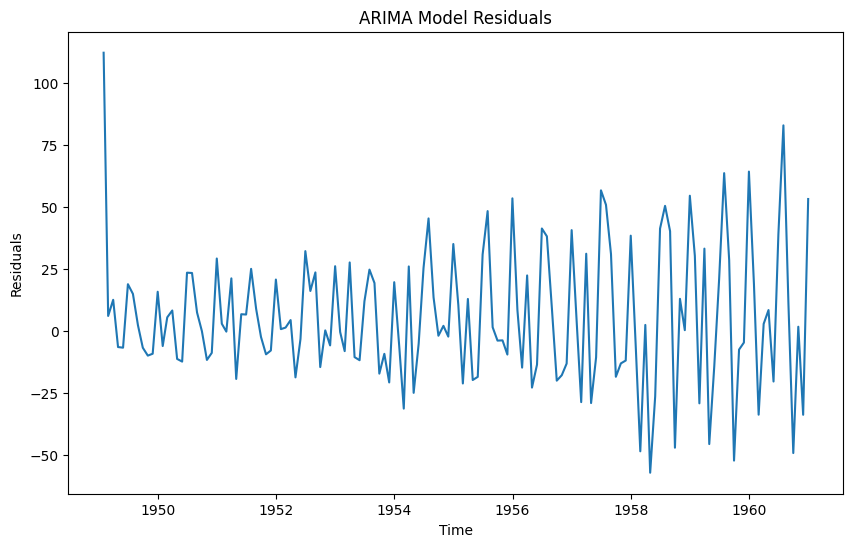

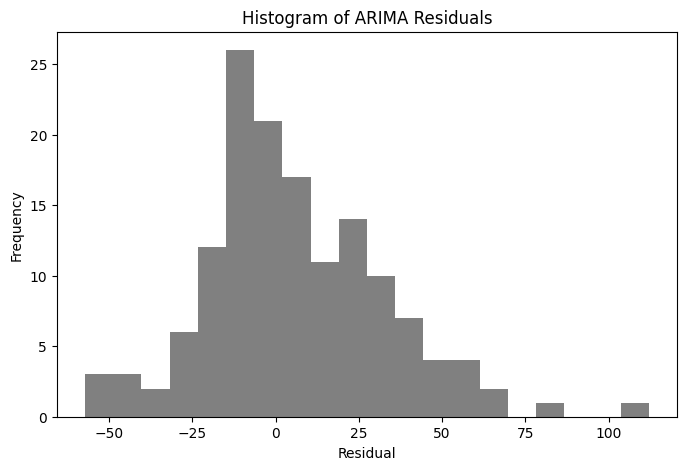

In [5]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('ARIMA Model Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=20, color='gray')
plt.title('Histogram of ARIMA Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

## 6. Forecast Future Values

Let's use the fitted ARIMA model to forecast the next 24 months of passenger numbers.

/var/folders/j8/hkxkfjqd58j9t_718vfr4tjw0000gn/T/ipykernel_7751/4019313611.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1] + pd.offsets.MonthEnd(1), periods=24, freq='M')


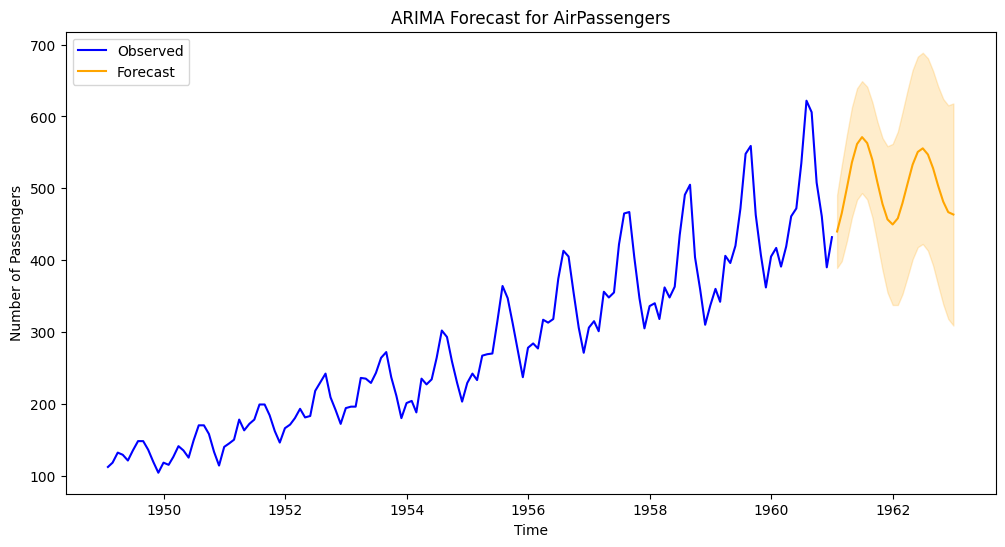

In [6]:
# Forecast the next 24 months
forecast = model_fit.get_forecast(steps=24)
forecast_index = pd.date_range(start=data.index[-1] + pd.offsets.MonthEnd(1), periods=24, freq='M')
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], label='Observed', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.2)
plt.title('ARIMA Forecast for AirPassengers')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

## 7. Compare ARIMA and STL Decomposition

ARIMA models are useful for forecasting and capturing trend and seasonality, but STL decomposition provides a more interpretable breakdown of components. Consider using both methods for a comprehensive time series analysis.

## 8. Summary

- ARIMA is a flexible model for time series forecasting, especially when data shows trend and seasonality.
- STL decomposition is useful for extracting interpretable components (trend, seasonality, residuals).
- Use ARIMA for prediction and STL for understanding underlying patterns.

**References:**
- [statsmodels ARIMA documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html)
- [STL decomposition documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.STL.html)
